#### read, clean data and load into csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read data from xls file

df1 = pd.read_excel("./Data/calculated-data.xls", header = 0)
df2 = pd.read_excel("./Data/descriptor-data.xls", header = 0)


In [3]:
# combine descriptor and structure information (input x)

datax = []
for i in range(178):
    matrix = []
    for j in range(8):
        ele = df1.iloc[i,j]
        data = []
        for k in range(31):
            if df2.iloc[k,0] == ele:
                for m in range(1,12):
                    data.append(df2.iloc[k,m])
            else:
                k += 1

        matrix.append(data)
        #print(matrix)

    matrix = np.array(matrix)
    #trans_matrix = matrix.T
    
    datax.append(matrix)

datax = np.array(datax)
print(datax.shape)
#print(datax[0])

np.save('./Data/datax.npy', datax)

(178, 8, 11)


In [4]:
# output data (output x)
datay =[]

for i in range(178):
    data = []
    data.append(df1.iloc[i,8])
    data.append(df1.iloc[i, 9])
    data.append(df1.iloc[i, 10])
    datay.append(data)

datay = np.array(datay)
print(datay.shape)
np.save('./Data/datay.npy', datay)

(178, 3)


In [6]:
datax = []
for i in range(178):
    matrix = []
    for j in range(8):
        ele = df1.iloc[i,j]
        data = []
        for k in range(31):
            if df2.iloc[k,0] == ele:
                for m in range(1,12):
                    data.append(df2.iloc[k,m])
            else:
                k += 1

        matrix.append(data)
        #print(matrix)

    matrix = np.array(matrix)
    trans_matrix = matrix.T
    
    datax.append(trans_matrix)

datax = np.array(datax)

In [19]:
print(datax.shape) 
print(datay.shape)
print(datay[0])
print(datay[0,1])

(178, 11, 8)
(178, 3)
[ 4.60961  3.06728 -9.58368]
3.06728


In [25]:
avg_data = []
for i in range(178):
    data = []
    for j in range(11):
        num = 0
        for k in range(8):
            num += datax[i,j][k]
        data.append(num)
    for m in range(3):
        data.append(datay[i,m])
    
    avg_data.append(data)
    #print(avg_data)
    
avg_data = np.array(avg_data)
print(avg_data.shape) 
print(avg_data)

(178, 14)
[[ 18.        2.       16.      ...   4.60961   3.06728  -9.58368]
 [ 33.       17.       16.      ...   2.41491   0.20424  -8.07869]
 [ 29.       14.       15.      ...   3.40883   1.63197 -10.26013]
 ...
 [ 32.       17.       15.      ...   2.05802  -0.83959  -7.75419]
 [ 29.       14.       15.      ...   2.55557  -0.23375  -7.8987 ]
 [ 25.       11.       14.      ...   3.5778    1.94136  -7.49942]]


In [26]:
print(avg_data[:, 0])

[18. 33. 29. 28. 27. 27. 30. 34. 28. 28. 28. 26. 22. 35. 25. 35. 21. 25.
 27. 31. 29. 36. 22. 24. 22. 25. 27. 24. 28. 34. 27. 34. 21. 24. 25. 26.
 27. 29. 21. 34. 34. 34. 27. 26. 30. 31. 29. 22. 24. 30. 25. 27. 33. 28.
 34. 27. 34. 26. 24. 21. 26. 26. 28. 25. 32. 34. 36. 28. 34. 29. 34. 28.
 26. 30. 33. 26. 29. 28. 23. 28. 24. 36. 32. 31. 30. 33. 25. 25. 28. 34.
 35. 35. 33. 34. 35. 35. 33. 34. 25. 26. 30. 27. 29. 32. 29. 34. 30. 31.
 33. 27. 25. 26. 25. 31. 29. 28. 33. 34. 36. 18. 30. 34. 27. 26. 30. 25.
 32. 30. 34. 29. 34. 25. 23. 33. 34. 24. 36. 34. 26. 32. 34. 33. 26. 30.
 26. 28. 29. 29. 24. 29. 26. 31. 25. 25. 28. 29. 31. 33. 30. 28. 34. 33.
 26. 30. 34. 32. 28. 30. 33. 29. 31. 34. 30. 31. 25. 32. 29. 25.]


#### descriptor relationship with OER

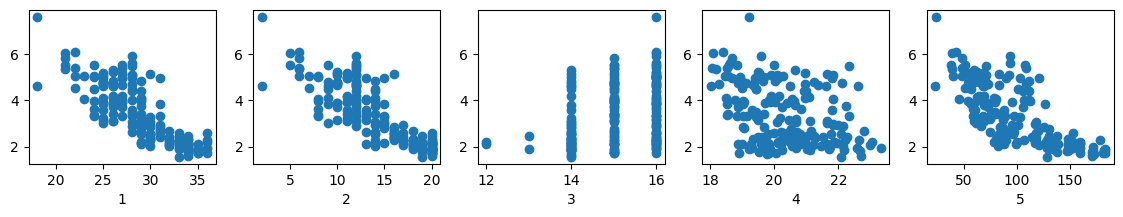

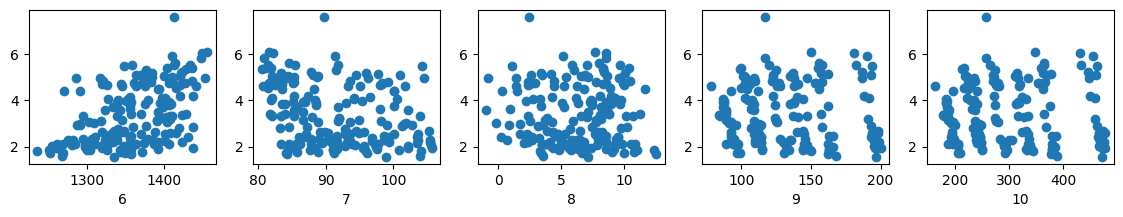

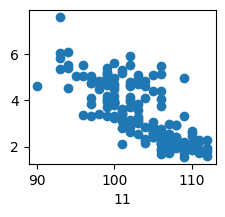

In [42]:
# visualize 
import matplotlib.pyplot as plt

m = 0
for i in range(2):
    plt.figure(figsize=(14,2))
    for j in range(1,6):
        plt.subplot(1,5,j)
        plt.scatter(avg_data[:,m], avg_data[:, 11])
        plt.xlabel(m+1)
        m += 1
        
plt.figure(figsize=(14,2))
plt.subplot(1,5,1)
plt.scatter(avg_data[:,10], avg_data[:, 11])
plt.xlabel(m+1)
plt.show()


#### save data for OER

In [46]:
# combine descriptor and structure information (input x)

datax = []
for i in range(178):
    matrix = []
    for j in range(8):
        ele = df1.iloc[i,j]
        data = []
        for k in range(31):
            if df2.iloc[k,0] == ele:
                for m in range(1,12):
                    if m not in [4, 7, 8, 9, 10]:
                        data.append(df2.iloc[k,m])
            else:
                k += 1

        matrix.append(data)
        #print(matrix)

    matrix = np.array(matrix)
    #trans_matrix = matrix.T
    
    datax.append(matrix)

datax = np.array(datax)
print(datax.shape)
#print(datax[0])

np.save('./Data/datax-OER.npy', datax)

(178, 8, 6)


#### descriptor relationship with ORR

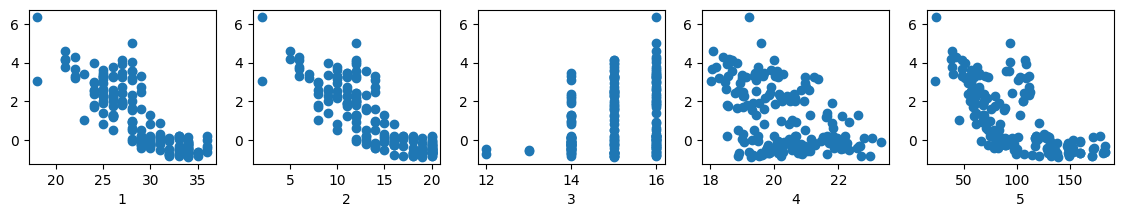

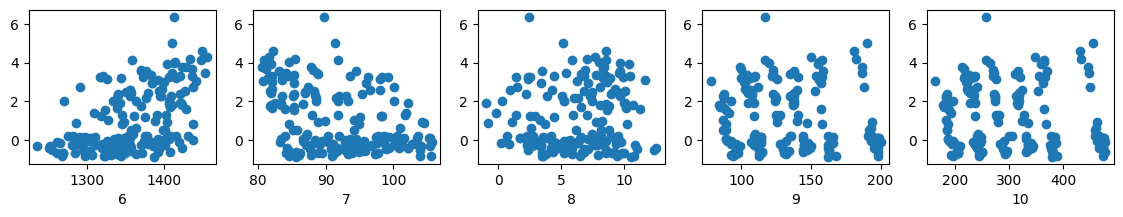

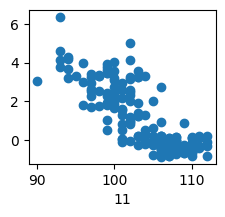

In [45]:
# visualize 
import matplotlib.pyplot as plt

m = 0
for i in range(2):
    plt.figure(figsize=(14,2))
    for j in range(1,6):
        plt.subplot(1,5,j)
        plt.scatter(avg_data[:,m], avg_data[:, 12])
        plt.xlabel(m+1)
        m += 1
        
plt.figure(figsize=(14,2))
plt.subplot(1,5,1)
plt.scatter(avg_data[:,10], avg_data[:, 12])
plt.xlabel(m+1)
plt.show()

#### save data for ORR

In [47]:
# combine descriptor and structure information (input x)

datax = []
for i in range(178):
    matrix = []
    for j in range(8):
        ele = df1.iloc[i,j]
        data = []
        for k in range(31):
            if df2.iloc[k,0] == ele:
                for m in range(1,12):
                    if m not in [7, 8, 9, 10]:
                        data.append(df2.iloc[k,m])
            else:
                k += 1

        matrix.append(data)
        #print(matrix)

    matrix = np.array(matrix)
    #trans_matrix = matrix.T
    
    datax.append(matrix)

datax = np.array(datax)
print(datax.shape)
#print(datax[0])

np.save('./Data/datax-ORR.npy', datax)

(178, 8, 7)


#### descriptor relationship with Binding energy

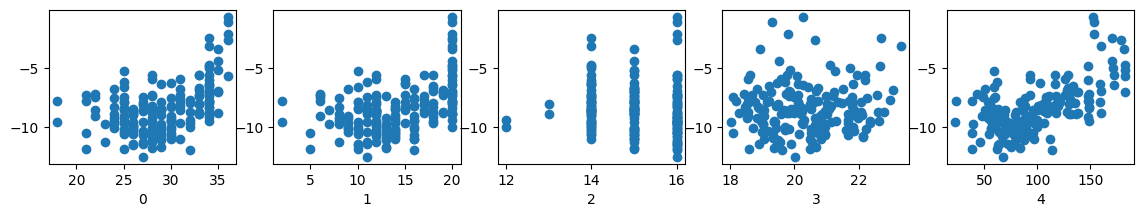

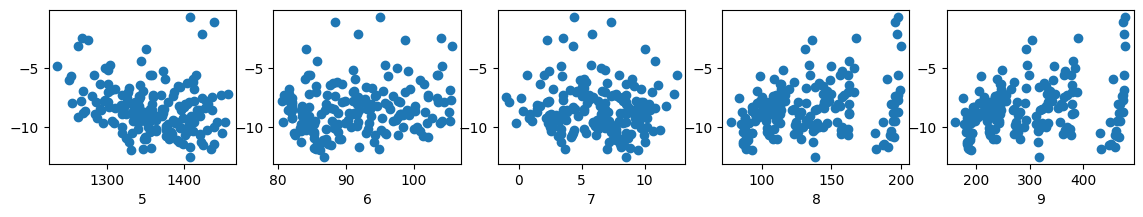

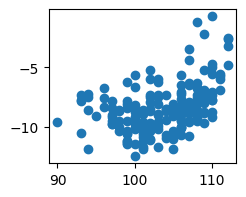

In [38]:
# visualize 
import matplotlib.pyplot as plt

m = 0
for i in range(2):
    plt.figure(figsize=(14,2))
    for j in range(1,6):
        plt.subplot(1,5,j)
        plt.scatter(avg_data[:,m], avg_data[:, 13])
        plt.xlabel(m)
        m += 1
        
plt.figure(figsize=(14,2))
plt.subplot(1,5,1)
plt.scatter(avg_data[:,10], avg_data[:, 13])
plt.show()

#### save data for binding energy

In [48]:
# combine descriptor and structure information (input x)

datax = []
for i in range(178):
    matrix = []
    for j in range(8):
        ele = df1.iloc[i,j]
        data = []
        for k in range(31):
            if df2.iloc[k,0] == ele:
                for m in range(1,12):
                    if m not in [3, 5, 6, 7, 8, 9, 10]:
                        data.append(df2.iloc[k,m])
            else:
                k += 1

        matrix.append(data)
        #print(matrix)

    matrix = np.array(matrix)
    #trans_matrix = matrix.T
    
    datax.append(matrix)

datax = np.array(datax)
print(datax.shape)
#print(datax[0])

np.save('./Data/datax-binding.npy', datax)

(178, 8, 4)
